## Day 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
climate_df=pd.read_csv("climate_dashboard_base.csv")

In climate data, anomalies represent extreme weather events such as unusually high rainfall, heat waves, or abnormal temperature variability. These are not errors but significant deviations that can indicate environmental risk.

In [4]:
Q1 = climate_df['Rain'].quantile(0.25)
Q3 = climate_df['Rain'].quantile(0.75)
IQR = Q3 - Q1

rain_threshold = Q3 + 1.5 * IQR

extreme_rain = climate_df[climate_df['Rain'] > rain_threshold]
extreme_rain.head()

,Year,Season,Temp_Range,Rain,Temp Max
25575,2021.0,Winter,8.9,0.2,30.7
25703,2021.0,Summer,11.0,5.0,37.4
25704,2021.0,Summer,11.2,12.0,36.0
25706,2021.0,Summer,7.2,6.0,31.6
25707,2021.0,Summer,8.5,2.0,32.7


The extracted records represent days with exceptionally high rainfall, likely corresponding to extreme weather events such as heavy monsoons or flooding conditions rather than measurement errors.

In [5]:
extreme_rain

,Year,Season,Temp_Range,Rain,Temp Max
25575,2021.0,Winter,8.9,0.2,30.7
25703,2021.0,Summer,11.0,5.0,37.4
25704,2021.0,Summer,11.2,12.0,36.0
25706,2021.0,Summer,7.2,6.0,31.6
25707,2021.0,Summer,8.5,2.0,32.7
...,...,...,...,...,...
26798,2024.0,Monsoon,6.3,4.0,32.7
26800,2024.0,Monsoon,6.7,0.3,34.3
26802,2024.0,Monsoon,9.3,20.0,34.8
26803,NaN,Post-Monsoon,7.7,18.0,33.1


In [7]:
heatwave_threshold = climate_df['Temp Max'].quantile(0.95)

heatwaves = climate_df[climate_df['Temp Max'] > heatwave_threshold]
heatwaves.head()

,Year,Season,Temp_Range,Rain,Temp Max
66,1951.0,Summer,16.870001,0.0,37.490002
128,1951.0,Summer,12.129999,0.0,37.009998
129,1951.0,Summer,12.400002,0.0,36.740002
130,1951.0,Summer,12.629999,0.0,37.009998
131,1951.0,Summer,12.420002,0.0,36.740002


Heatwave days are identified as those exceeding the 95th percentile of maximum temperature. This adaptive threshold captures extreme heat events while remaining robust to long-term warming trends.

In [8]:
range_threshold = climate_df['Temp_Range'].quantile(0.95)

extreme_variability = climate_df[
    climate_df['Temp_Range'] > range_threshold
]

extreme_variability.head()

,Year,Season,Temp_Range,Rain,Temp Max
8,1951.0,Winter,17.830000,0.0,30.930000
9,1951.0,Winter,17.110000,0.0,30.660000
26,1951.0,Winter,17.159999,0.0,30.879999
27,1951.0,Winter,17.460001,0.0,31.370001
43,1951.0,Winter,17.340000,0.0,31.020000


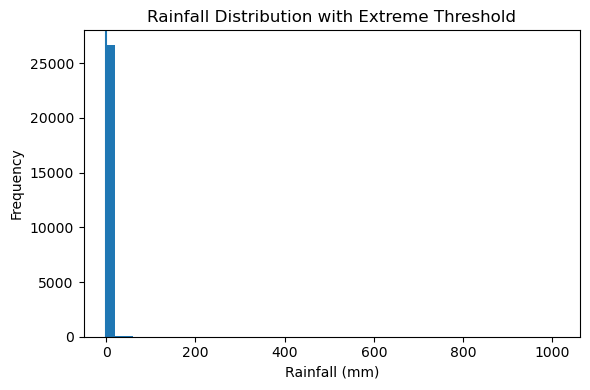

In [9]:
plt.figure(figsize=(6,4))
plt.hist(climate_df['Rain'], bins=50)
plt.axvline(rain_threshold)
plt.title("Rainfall Distribution with Extreme Threshold")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The rainfall distribution is heavily right-skewed, with most days experiencing little to no rainfall. The long tail represents extreme rainfall events, which are isolated using the IQR-based threshold.

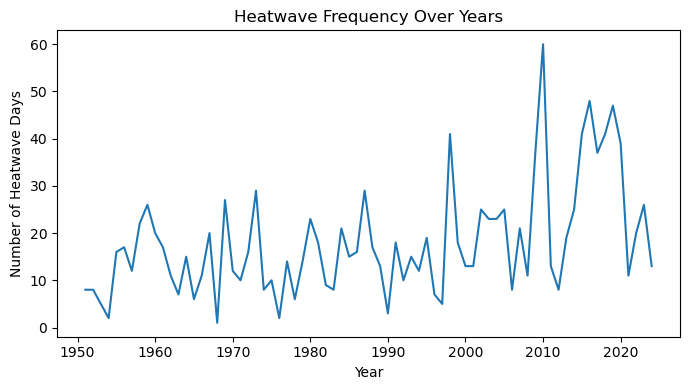

In [10]:
heatwave_yearly = heatwaves.groupby('Year').size()

plt.figure(figsize=(7,4))
plt.plot(heatwave_yearly.index, heatwave_yearly.values)
plt.title("Heatwave Frequency Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Heatwave Days")
plt.tight_layout()
plt.show()

The heatwave frequency shows an overall increasing tendency over time, with notable spikes in recent decades. This suggests a rise in extreme heat events, potentially influenced by climate change and urbanization effects.

In [11]:
extreme_rain.to_csv("extreme_rain_events.csv", index=False)
heatwaves.to_csv("heatwave_days.csv", index=False)
extreme_variability.to_csv("extreme_temp_variability.csv", index=False)

Day 10 focused on identifying extreme climate events using robust statistical methods. High rainfall, heatwave days, and abnormal temperature variability were detected using IQR and percentile-based thresholds. Visual analysis confirmed the presence of right-skewed rainfall distributions and increasing heatwave frequency, highlighting potential climate risk patterns suitable for monitoring dashboards and predictive modeling.